# Primer entregable del reto: Diagnóstico de la Malaria

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Paso 1. Crear el campo eléctrico para una sola carga en el origen¶


In [2]:
#t = np.linspace(-2, 2, 9)

x = np.linspace(-2, 2, 9)
y = np.linspace(-2, 2, 9)

In [3]:
X,Y = np.meshgrid(x, y)

In [4]:
eps_0 = 8.8542e-12
k_e = 1/(4*np.pi*eps_0)
q = 20e-6

In [5]:
k_e

8987539421.511562

In [6]:
r2 = X**2 + Y**2
r = r2 ** (1/2)
E = k_e*(q/r2)

# se queja porque hay divisiones entre 0, pero las hace. 

/Users/FuhrerMaicol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# utilizo el método del profesor con números complejos (normal + imaginario(1j)

angulo = np.angle(X+Y*1j)

In [8]:
Ex = E*np.cos(angulo)
Ey = E*np.sin(angulo)

/Users/FuhrerMaicol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


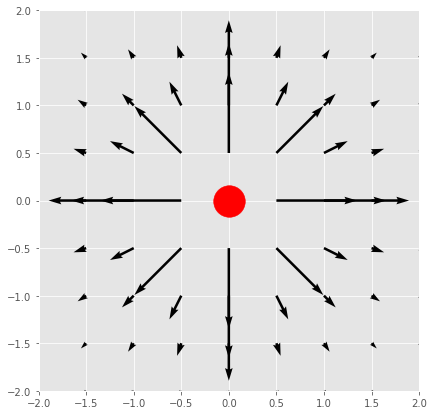

In [9]:
# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (7,7))

# Agregamos al eje (ax) las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex,Ey)
# Dibujamos en el eje (ax) la carga puntual usando plt.scatter()
ax.scatter(0,0,c='red',s=1000)
# Configuramos las dimensiones del eje y el aspecto
ax.axis([-2,2,-2,2])
ax.set_aspect('equal','box')

In [10]:
magnitud = (Ex**2 + Ey**2)**(1/2)

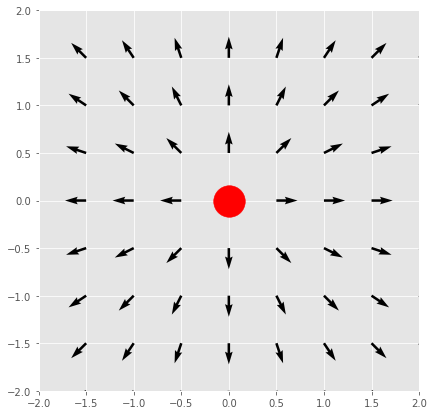

In [11]:
Ex_unitario = Ex/magnitud
Ey_unitario = Ey/magnitud

# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (7,7))

# Agregamos al eje las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex_unitario,Ey_unitario)
# Dibujamos la carga puntual usando plt.scatter()
ax.scatter(0,0,c='red',s=1000)
#Configuramos las dimensiones del eje y el aspecto
ax.axis([-2,2,-2,2])
ax.set_aspect('equal','box')

## Paso 2. Cambiando la posición de carga

In [12]:
N = 21
grid_min = -10
grid_max = 10

In [13]:
# t = np.linspace(-10,10,21)

x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)

X,Y = np.meshgrid(x, y)

In [14]:
eps_0 = 8.8542e-12
k_e = 1/(4*np.pi*eps_0)

In [15]:
# Además de definir el valor de q, definimos su coordenada. 

q = 50e-6
q_loc = [-2.5,0]

In [16]:
# Actulizar X, Y para que no sean en el origen.

X_new = X - q_loc[0] 
Y_new = Y - q_loc[1]

r2 = X_new**2 + Y_new**2
E = k_e*(q/r2)

In [17]:
angulo = np.angle(X_new+Y_new*1j)

In [18]:
Ex = E*np.cos(angulo)
Ey = E*np.sin(angulo)

mags = (Ex**2 + Ey**2)**(1/2)

Ex_unit = Ex/mags
Ey_unit = Ey/mags

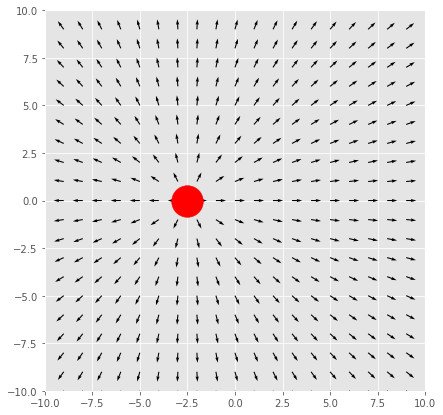

In [19]:
# Creamos una figura y eje con plt.subplots()
fig, ax = plt.subplots(figsize = (7,7))

# Agregamos al eje las flechas de los vectores con plt.quiver()
ax.quiver(X,Y,Ex_unit,Ey_unit)
# Dibujamos la carga puntual usando plt.scatter()
ax.scatter(q_loc[0],q_loc[1],c='red',s=1000)
#Configuramos las dimensiones del eje y el aspecto
ax.axis([-10,10, -10,10])
ax.set_aspect('equal','box')

## Paso 3. Agregando dos o más cargas al campo

In [20]:
# Agrego una nueva carga con su valor definido y su coordenada definida. 

q2 = -53e-6
q2_loc = [2,0]

In [21]:
X_new2 = X - q2_loc[0] #se resta por algo que ver con numpy, checar video del prof de compu
Y_new2 = Y - q2_loc[1]

r2 = X_new2**2 + Y_new2**2
E2 = k_e*(q2/r2)

/Users/FuhrerMaicol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [22]:
# Nuevo ángulo
angulo2 = np.angle(X_new2+Y_new2*1j)

In [23]:
# Componentes de las cargas
Ex2 = E2*np.cos(angulo2)
Ey2 = E2*np.sin(angulo2)

mags_2 = (Ex2**2 + Ey2**2)**(1/2)

Ex_unit2 = Ex2/mags_2
Ey_unit2 = Ey2/mags_2

/Users/FuhrerMaicol/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
# Sumamos los componentes de los vectores con el principio de superposición para encontrar el vector resultante

ExR = Ex + Ex2
EyR = Ey + Ey2

mags_R = (ExR**2 + EyR**2)**(1/2)

ExR_unit = ExR/mags_R
EyR_unit = EyR/mags_R

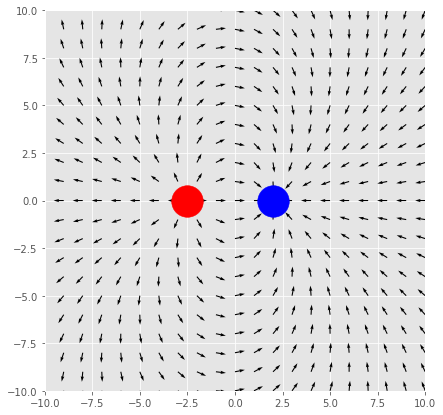

In [25]:
# Gráfica con dos vectores
fig, ax = plt.subplots(figsize=(7, 7))

# Crear un Campo Vectorial
ax.quiver(X, Y, ExR_unit, EyR_unit)
# Dibujar Carga puntual
ax.scatter(q_loc[0], q_loc[1], c='red', s=1000)
ax.scatter(q2_loc[0], q2_loc[1], c='blue', s=1000)
# Configuramos las dimensiones del eje y el aspecto
ax.axis([grid_min, grid_max, grid_min, grid_max])
ax.set_aspect('equal', 'box')